In [ ]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ball_drop = np.loadtxt("/content/drive/My Drive/ball_drop_f - yt.csv", delimiter = ",")
ball_drop_time = ball_drop[:,0]
ball_drop_y = ball_drop[:,1]

fit_equation, cov = np.polyfit(ball_drop_time, ball_drop_y, 2, cov = True)
print(fit_equation[0])
print("Gravity from fit: " + str(fit_equation[0] * -2 ))
error = np.sqrt(cov[0,0]) / np.abs(fit_equation[0])
print(error)
grad = np.gradient(ball_drop_y, ball_drop_time)
grad2 = np.gradient(grad, ball_drop_time)
print(grad2)
print(np.mean(grad2))
print(np.std(grad2))

-4.491403585866938
Gravity from fit: 8.982807171733876
0.02093703231672967
[ -4.08385878  -7.1069348  -11.10824726  -9.63155379  -8.6024587
 -11.07165132  -8.2291911   -7.08210111 -10.3319593   -6.62523551
  -1.86960192  -1.1706175 ]
-7.242784257483298
3.2122125152467906


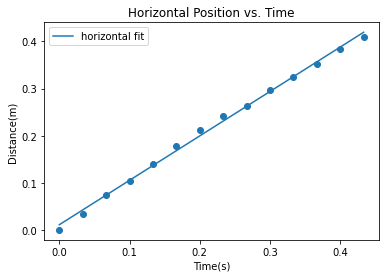

In [ ]:
horizontal = np.loadtxt("/content/drive/My Drive/horizontal_data", delimiter = ",")
horizontal_time = horizontal[:, 0]
horizontal_x = horizontal[:, 1] #in meters
horizontal_y = horizontal[:, 2]

x_position, cov_x = np.polyfit(horizontal_time, horizontal_x, 1, cov = True) #linear 
y_position, cov_y = np.polyfit(horizontal_time, horizontal_y, 2, cov = True)
x_equation = x_position[0] * horizontal_time + x_position[1]
y_equation = y_position[0] * (horizontal_time ** 2) + y_position[1] * horizontal_time + y_position[2]

plt.title("Horizontal Position vs. Time")
plt.xlabel("Time(s)")
plt.ylabel("Distance(m)")
plt.plot(horizontal_time, x_equation, label = 'horizontal fit')
plt.scatter(horizontal_time, horizontal_x)
plt.legend()



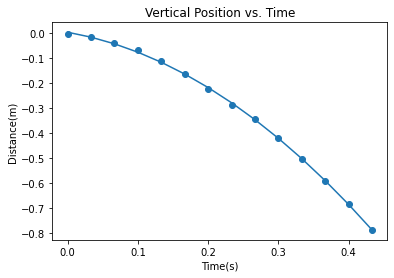

In [ ]:
plt.title("Vertical Position vs. Time")
plt.xlabel("Time(s)")
plt.ylabel("Distance(m)")
plt.plot(horizontal_time, y_equation, label = 'vertical fit')
plt.scatter(horizontal_time, horizontal_y)

In [ ]:
error_x = cov_x
print("Initial velocity for X Graph(m/s): " + str(x_position[0]))
print("Error for initial velocity in X Graph: " + str(error_x[0,0])) #error for initial velocity 
print()
error_y = cov_y
print("Initial acceleration downward for Y Graph(m/s): " + str(y_position[0] * -2))
print("Initial velocity for Y Graph(m/s^2): " + str(y_position[1]))
print("Error for initial acceleration in Y Graph: " + str(error_y[0,0])) #initial acceleration
print("Error for initial velocity in Y Graph: " + str(error_y[1,0]))

Initial velocity for X Graph(m/s): 0.9427186539575899
Error for initial velocity in X Graph: 0.00022621037699786177

Initial acceleration downward for Y Graph(m/s): 6.173085484809202
Initial velocity for Y Graph(m/s^2): -0.49180451571997874
Error for initial acceleration in Y Graph: 0.006780820574313119
Error for initial velocity in Y Graph: -0.0029383555821074687


In [ ]:
#potential reasons for error: motion blur faster speeds, camera angle changes as ball falls 